In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r"C:\Users\CS\Desktop\ToyotaCorolla - MLR.csv")
df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


### task 1:- performing EDA

In [21]:
# Summary statistics
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [22]:

# Check for null values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

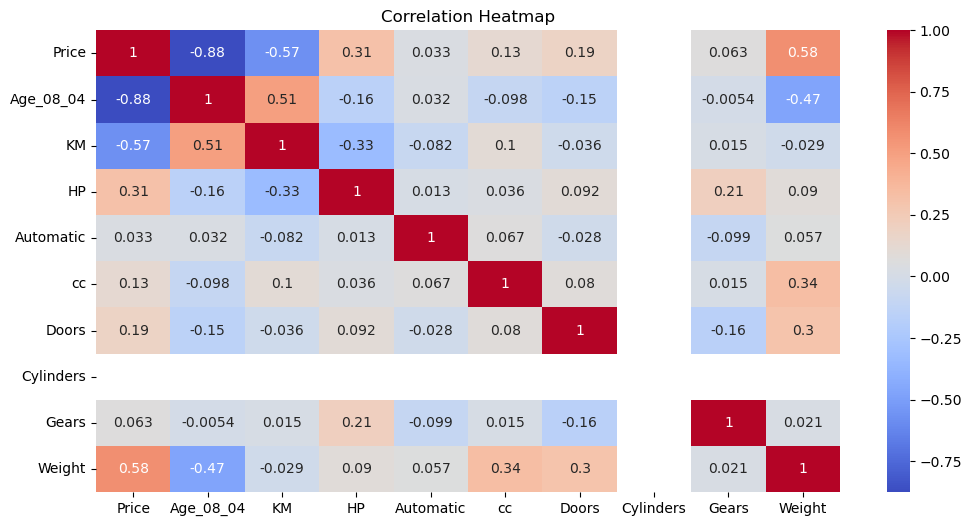

In [23]:

# Visualizations
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


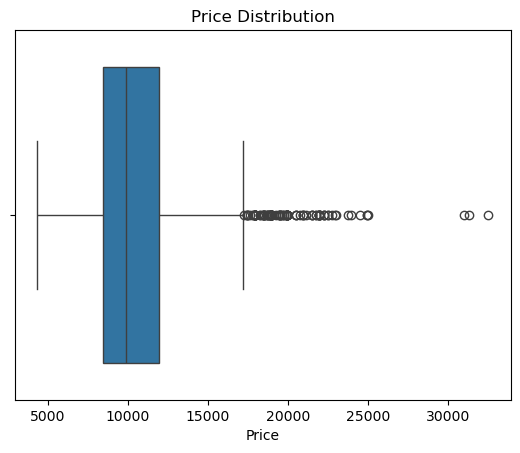

In [24]:

# Boxplot for price
sns.boxplot(x=df['Price'])
plt.title("Price Distribution")
plt.show()

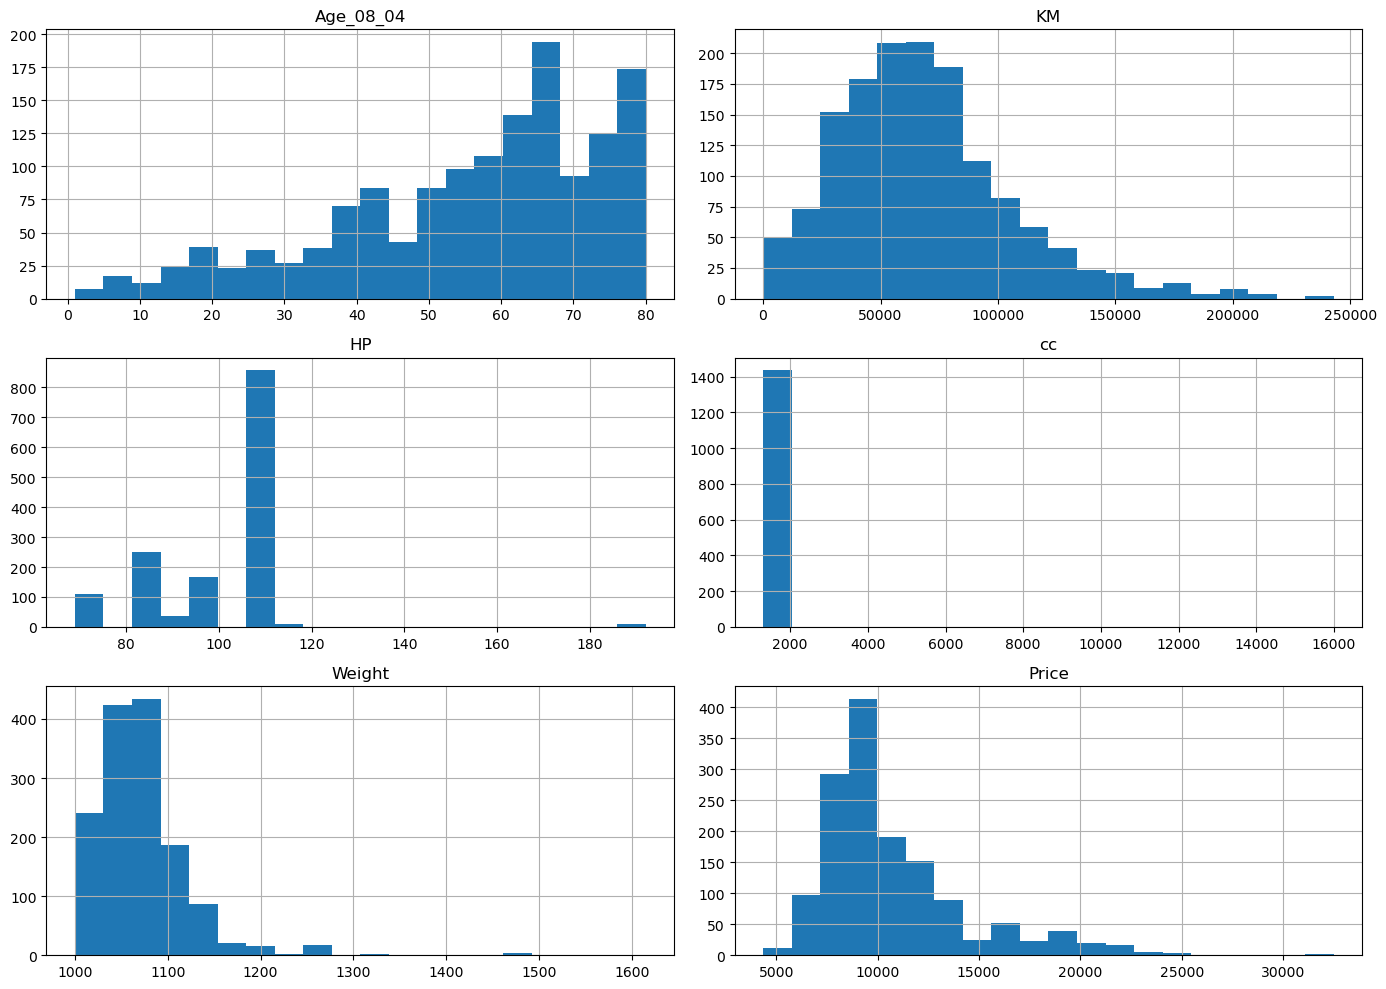

In [25]:

# Distribution plots
numerical_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']
df[numerical_cols].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()


In [26]:
# data preprocessing 
# Convert categorical variable
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)  # Avoid dummy variable trap



In [27]:

# Features and target
X = df.drop(['Price'], axis=1)
y = df['Price']



In [28]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# train-test and split 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

### task 3:- building MLR models

#### model 1:- all features

In [31]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print("Model 1 - R2 Score:", r2_score(y_test, y_pred1))
print("Model 1 - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

Model 1 - R2 Score: 0.8348888040611081
Model 1 - RMSE: 1484.265415329652


#### model 2:- top correlated features

In [32]:
top_features = ['Age_08_04', 'Weight', 'HP', 'KM', 'Price']
X2 = df[top_features]
X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_scaled, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)

print("Model 2 - R2 Score:", r2_score(y2_test, y_pred2))
print("Model 2 - RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred2)))


Model 2 - R2 Score: 1.0
Model 2 - RMSE: 3.1042035540959347e-12


#### model 3:-Exclude Collinear Features (like KM and Age if highly correlated)

In [33]:
reduced_features = X.drop(['KM'], axis=1)
reduced_scaled = scaler.fit_transform(reduced_features)

X3_train, X3_test, y3_train, y3_test = train_test_split(
    reduced_scaled, y, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)

print("Model 3 - R2 Score:", r2_score(y3_test, y_pred3))
print("Model 3 - RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred3)))


Model 3 - R2 Score: 0.8078114279853932
Model 3 - RMSE: 1601.353032458324


### task 4:- applying lasso and ridge regression

In [34]:
#Interpretation
#Lasso tends to shrink some coefficients to zero, which helps with feature selection.
#Ridge penalizes large coefficients but keeps all features, helping reduce overfitting.

In [35]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge R^2:", r2_score(y_test, ridge_pred))

# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R^2:", r2_score(y_test, lasso_pred))

Ridge R^2: 0.8350658145414688
Lasso R^2: 0.8351214316622071


In [36]:
##Interview Questions:

In [37]:
# Q1: What is Normalization & Standardization, and How Are They Helpful?

# Normalization:
# Scales feature values to a fixed range, usually between 0 and 1.
#  Useful when features have different scales and don't follow a normal distribution.
#  Preserves relative distances between values.
#  Common method: Min-Max Scaling.

# Standardization:
#  Rescales features so they have a mean of 0 and standard deviation of 1.
#  Best when data is normally distributed or when algorithms assume Gaussian input.
#  Common method: Z-score Standardization.

# Why It's Helpful:
#  Ensures all features contribute fairly to the model.
#  Speeds up training and improves accuracy.
#  Prevents bias toward features with larger scales.
#  Essential for distance-based models like KNN, K-means, and for regularized models like Lasso or Ridge.


In [38]:
# Q2: What Techniques Can Be Used to Address Multicollinearity in Multiple Linear Regression?

# What is Multicollinearity?
#  Occurs when two or more independent variables are highly correlated.
# It can make coefficient estimates unstable and hard to interpret.

# Techniques to Handle Multicollinearity:

# 1. Variance Inflation Factor (VIF):
#  Calculate VIF for each feature.
#  Drop features with VIF > 10 (or sometimes > 5) to reduce redundancy.

# 2. Feature Selection:
#  Manually remove highly correlated or redundant features.
#  Use automated methods like Recursive Feature Elimination (RFE) for selection.

# 3. Principal Component Analysis (PCA):
#  Convert correlated variables into a smaller set of uncorrelated components.

# 4. Regularization (Ridge or Lasso Regression):
# Ridge reduces the effect of multicollinearity by shrinking coefficients.
#  Lasso can completely eliminate irrelevant or correlated features.

# 5. Domain Knowledge:
# Use subject matter expertise to keep the most meaningful and relevant predictors.
